# Dataset Exploration and Processing

# Dataset 1

The dataset, "People - Segmentation", is available on Kaggle.com at [this link](https://www.kaggle.com/datasets/quantigoai/people-segmentation). The dataset is split into the image folder and the annotations. The masks will need to be generated for each image in the dataset. 

## Data

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

with open('People/annotations/instances.json', 'r') as f:
    annotations = json.load(f)

annotations.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [70]:
print(annotations['annotations'][0].keys())
print(annotations['images'][0].keys())

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
dict_keys(['license', 'file_name', 'url', 'height', 'width', 'date_captured', 'id'])


I will reorganize the information I need for this project into a separate csv file. 

In [71]:
dataset_dict = dict()

for img in annotations['images']:
    dataset_dict[img['id']] = [img['file_name'], img['height'], img['width'], None]

for annot in annotations['annotations']:
    dataset_dict[annot['image_id']][3] = annot['segmentation']


In [72]:
image_ids = []
image_paths = []
image_segments = []
image_heights = []
image_widths = []

for i, (p, h, w, s) in dataset_dict.items():
    image_ids.append(i)
    image_heights.append(h)
    image_widths.append(w)
    image_paths.append(p)
    image_segments.append(s)


df = pd.DataFrame({
    'id':image_ids, 
    'path':image_paths, 
    'height':image_heights, 
    'width':image_widths, 
    'segment':image_segments
    })
df

,id,path,height,width,segment
0,16572669,a-happy-woman-5321361__340.jpg,340,227,"[[60.0, 320.0, 62.0, 316.0, 66.0, 310.0, 74.0,..."
1,16572670,a-man-3708963__340.jpg,340,509,"[[0.0, 218.0, 0.0, 339.0, 283.0, 339.0, 283.0,..."
2,16572671,a-smile-2127788__340.jpg,340,225,"[[0.0, 209.0, 5.0, 203.0, 13.0, 193.0, 19.0, 1..."
3,16572672,abe-shinzo-867817__340.jpg,340,255,"[[0.0, 339.0, 4.0, 327.0, 8.0, 316.0, 13.0, 30..."
4,16572673,accessories-3557623__340.jpg,340,510,"[[244.0, 339.0, 248.0, 332.0, 245.0, 327.0, 24..."
...,...,...,...,...,...
1297,16573968,face-1391628__340.jpg,340,232,"[[71.0, 26.0, 77.0, 19.0, 86.0, 12.0, 96.0, 8...."
1298,16573969,face-1424086__340.jpg,340,226,"[[48.0, 232.0, 48.0, 224.0, 45.0, 216.0, 42.0,..."
1299,16573970,face-1424088__340.jpg,340,226,"[[89.0, 0.0, 148.0, 0.0, 152.0, 6.0, 158.0, 4...."
1300,16573971,face-1449952__340.jpg,340,452,"[[77.0, 0.0, 167.0, 0.0, 401.0, 0.0, 404.0, 7...."


In [73]:
df[pd.isna(df['segment'])]

,id,path,height,width,segment
1235,16573906,day-of-the-dead-2014570__340.jpg,340,256,None
1236,16573907,day-of-the-dead-4817335__340.png,340,262,None
1237,16573908,decoration-170779__340.jpg,340,427,None
1238,16573909,decoration-170780__340.jpg,340,432,None


In [74]:
df = df[pd.notna(df['segment'])]
df

,id,path,height,width,segment
0,16572669,a-happy-woman-5321361__340.jpg,340,227,"[[60.0, 320.0, 62.0, 316.0, 66.0, 310.0, 74.0,..."
1,16572670,a-man-3708963__340.jpg,340,509,"[[0.0, 218.0, 0.0, 339.0, 283.0, 339.0, 283.0,..."
2,16572671,a-smile-2127788__340.jpg,340,225,"[[0.0, 209.0, 5.0, 203.0, 13.0, 193.0, 19.0, 1..."
3,16572672,abe-shinzo-867817__340.jpg,340,255,"[[0.0, 339.0, 4.0, 327.0, 8.0, 316.0, 13.0, 30..."
4,16572673,accessories-3557623__340.jpg,340,510,"[[244.0, 339.0, 248.0, 332.0, 245.0, 327.0, 24..."
...,...,...,...,...,...
1297,16573968,face-1391628__340.jpg,340,232,"[[71.0, 26.0, 77.0, 19.0, 86.0, 12.0, 96.0, 8...."
1298,16573969,face-1424086__340.jpg,340,226,"[[48.0, 232.0, 48.0, 224.0, 45.0, 216.0, 42.0,..."
1299,16573970,face-1424088__340.jpg,340,226,"[[89.0, 0.0, 148.0, 0.0, 152.0, 6.0, 158.0, 4...."
1300,16573971,face-1449952__340.jpg,340,452,"[[77.0, 0.0, 167.0, 0.0, 401.0, 0.0, 404.0, 7...."


In [75]:
df.to_csv('People/path_segment.csv', index=False)

## Create and save the image masks

In [91]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw

for index, row in df.iterrows():
    path = row['path']
    height = row['height']
    width = row['width']
    segmentation = row['segment']

    # Create an empty mask
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    
    # Convert segmentation points to integers and reshape the array
    segmentation = np.array(segmentation, dtype=np.int32).reshape((-1, 2))
    
    # Fill the mask based on segmentation points using Pillow
    draw.polygon(segmentation.flatten().tolist(), outline=255, fill=255)

    mask = mask.convert('1')
    
    mask_filename = f'People/masks/{path[:-4]}.png'
    mask.save(mask_filename)


In [92]:
paths_df = pd.DataFrame({
    'image':df['path']
})
paths_df['mask'] = paths_df['image'].apply(lambda x: f'People/masks/{x[:-4]}.png')
paths_df['image'] = paths_df['image'].apply(lambda x: f'People/images/{x}')

paths_df

,image,mask
0,People/images/a-happy-woman-5321361__340.jpg,People/masks/a-happy-woman-5321361__340.png
1,People/images/a-man-3708963__340.jpg,People/masks/a-man-3708963__340.png
2,People/images/a-smile-2127788__340.jpg,People/masks/a-smile-2127788__340.png
3,People/images/abe-shinzo-867817__340.jpg,People/masks/abe-shinzo-867817__340.png
4,People/images/accessories-3557623__340.jpg,People/masks/accessories-3557623__340.png
...,...,...
1297,People/images/face-1391628__340.jpg,People/masks/face-1391628__340.png
1298,People/images/face-1424086__340.jpg,People/masks/face-1424086__340.png
1299,People/images/face-1424088__340.jpg,People/masks/face-1424088__340.png
1300,People/images/face-1449952__340.jpg,People/masks/face-1449952__340.png


In [93]:
paths_df.to_csv('People/paths.csv', index=False)

In [94]:
paths_df.values.flatten()

array(['People/images/a-happy-woman-5321361__340.jpg',
       'People/masks/a-happy-woman-5321361__340.png',
       'People/images/a-man-3708963__340.jpg', ...,
       'People/masks/face-1449952__340.png',
       'People/images/face-1476766__340.jpg',
       'People/masks/face-1476766__340.png'], dtype=object)

## Examples

In [97]:
import matplotlib.pyplot as plt

def load_n_samples(paths_df, n, path=None):
    fig, axes = plt.subplots(ncols = 4, nrows=n//4, figsize=(8,6), facecolor='black')
    sampled_df = paths_df.sample(n=n)
    sampled_df = sampled_df[['image', 'mask']]

    for i, ax in enumerate(axes.flat):
        filename = sampled_df.values.flatten()[i]
        im = Image.open(filename)
        ax.imshow(im)
        ax.axis('off')

    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

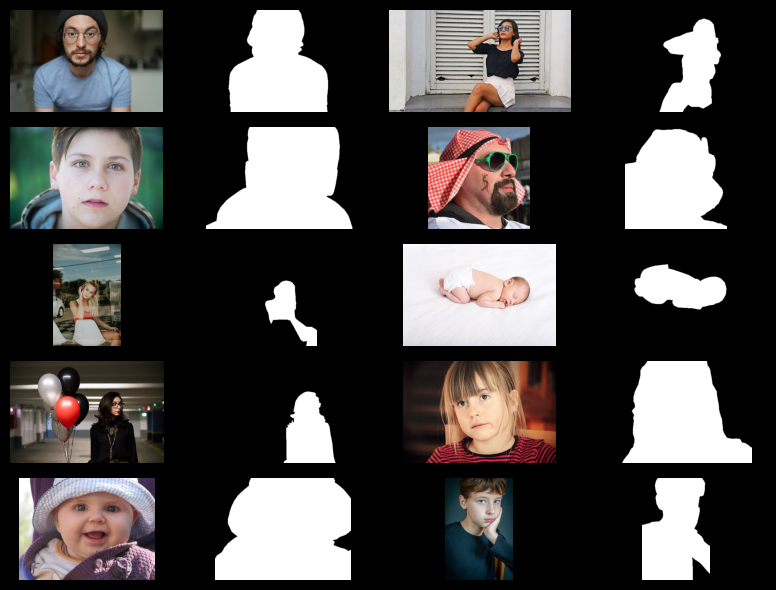

In [98]:
load_n_samples(paths_df, 20, path='plots/dataset1.png')

# Dataset 2

The Peoples dataset is available [here](https://ecosystem.supervisely.com/projects/persons). This dataset has a different format so I will need to use a different procedure to generate the masks. I will first organize all the file paths in a pandas dataframe to better keep track of all the files.

In [82]:
import os
import pandas as pd

dataset_directory = 'Supervisely Person Dataset'

image_paths = []
annotation_paths = []

new_df = pd.DataFrame({'image': [], 'annotation': []})

for dataset_folder in os.listdir(dataset_directory):
    dataset_path = os.path.join(dataset_directory, dataset_folder)
    if os.path.isdir(dataset_path):

        image_folder = os.path.join(dataset_path, 'img')
        annot_folder = os.path.join(dataset_path, 'ann')
        if os.path.exists(image_folder) and os.path.exists(annot_folder):

            for image_filename in os.listdir(image_folder):
                if image_filename.endswith('.png'):
                    image_path = os.path.join(image_folder, image_filename)

                    annotation_filename = image_filename.replace('.png', '.png.json')
                    annotation_path = os.path.join(annot_folder, annotation_filename)

                    if os.path.exists(annotation_path):
                        image_paths.append(image_path)
                        annotation_paths.append(annotation_path)


new_df = pd.DataFrame({'image': image_paths, 'annotation': annotation_paths})


In [83]:
new_df.head()

,image,annotation
0,Supervisely Person Dataset/ds6/img/pexels-phot...,Supervisely Person Dataset/ds6/ann/pexels-phot...
1,Supervisely Person Dataset/ds6/img/golf-sunset...,Supervisely Person Dataset/ds6/ann/golf-sunset...
2,Supervisely Person Dataset/ds6/img/pexels-phot...,Supervisely Person Dataset/ds6/ann/pexels-phot...
3,Supervisely Person Dataset/ds6/img/pexels-phot...,Supervisely Person Dataset/ds6/ann/pexels-phot...
4,Supervisely Person Dataset/ds6/img/pexels-phot...,Supervisely Person Dataset/ds6/ann/pexels-phot...


Create a directory called "People2" with subfolders "images", "annotations" and "masks". The code below will copy the images and annotations to one large folder instead of the many subfolders in the original dataset. I will also delete any image and annotation pair if the annotation format is inconsistent. 

In [84]:
import shutil

destination_directory = 'People2'

for index, row in new_df.iterrows():
    source_image_path = row['image']
    source_annotation_path = row['annotation']
    
    destination_image_path = os.path.join(destination_directory, 'images', os.path.basename(source_image_path))
    destination_annotation_path = os.path.join(destination_directory, 'annotations', os.path.basename(source_annotation_path))
    
    shutil.copy(source_image_path, destination_image_path)
    shutil.copy(source_annotation_path, destination_annotation_path)

In [85]:
import json

annotations_directory = 'People2/annotations/'
images_directory = 'People2/images/'

# Iterate through annotation files
for annotation_file in os.listdir(annotations_directory):
    annotation_path = os.path.join(annotations_directory, annotation_file)
    image_path = os.path.join(images_directory, os.path.splitext(annotation_file)[0])

    if annotation_file.endswith('.json'):
        with open(annotation_path, 'r') as json_file:
            annotation_data = json.load(json_file)

        if 'objects' in annotation_data and not any('points' in obj for obj in annotation_data['objects']):
            os.remove(annotation_path)
            if os.path.exists(image_path):
                os.remove(image_path)
            print(f"Deleted {annotation_file} and corresponding image.")

Deleted pexels-photo-271721.png.json and corresponding image.
Deleted pexels-photo-880929.png.json and corresponding image.
Deleted pexels-photo-878682.png.json and corresponding image.
Deleted pexels-photo-59715.png.json and corresponding image.
Deleted beauty-leather-style-girl-160599.png.json and corresponding image.
Deleted pregnant-pregnancy-mom-child.png.json and corresponding image.
Deleted summer-pool-woman-red.png.json and corresponding image.
Deleted pexels-photo-261263.png.json and corresponding image.
Deleted pexels-photo-370037.png.json and corresponding image.
Deleted pexels-photo-257473.png.json and corresponding image.
Deleted pexels-photo-261268.png.json and corresponding image.
Deleted pexels-photo-751240.png.json and corresponding image.
Deleted pexels-photo-592941.png.json and corresponding image.
Deleted pexels-photo-863807.png.json and corresponding image.
Deleted pexels-photo-863946.png.json and corresponding image.
Deleted pexels-photo-242007.png.json and corres

In [86]:

_files = [file for file in os.listdir('People2/annotations/') if file.endswith('.json')]
json_files = [annotations_directory+i for i in _files]
image_files = [images_directory+i[:-5] for i in _files]
mask_files = ['People2/masks/'+i[:-5] for i in _files]

new_df = pd.DataFrame({'image': [], 'annotation': []})
new_df = pd.DataFrame({'image': image_files, 'annotation': json_files, 'mask':mask_files})

new_df.head()

,image,annotation,mask
0,People2/images/pexels-photo-417059.png,People2/annotations/pexels-photo-417059.png.json,People2/masks/pexels-photo-417059.png
1,People2/images/pexels-photo-863859.png,People2/annotations/pexels-photo-863859.png.json,People2/masks/pexels-photo-863859.png
2,People2/images/pexels-photo-576835.png,People2/annotations/pexels-photo-576835.png.json,People2/masks/pexels-photo-576835.png
3,People2/images/girl-indian-red-oriental-160585...,People2/annotations/girl-indian-red-oriental-1...,People2/masks/girl-indian-red-oriental-160585.png
4,People2/images/tourist-girl-backpack-vacation-...,People2/annotations/tourist-girl-backpack-vaca...,People2/masks/tourist-girl-backpack-vacation-1...


## Create and save the image masks

In [87]:
from PIL import Image, ImageDraw
import numpy as np

def json_to_mask(json_data, image_shape):
    mask = Image.new('L', (image_shape[1], image_shape[0]), 0)  # Create a black mask image
    draw = ImageDraw.Draw(mask)
    objects = json_data.get('objects', [])
    for obj in objects:
        exterior_points = obj.get('points', {}).get('exterior', [])
        if exterior_points:
            flattened_exterior_points = [point for sublist in exterior_points for point in sublist]
            draw.polygon(flattened_exterior_points, outline=1, fill=1)
        
        interior_points_sets = obj.get('points', {}).get('interior', [])
        if interior_points_sets:
            for interior_points in interior_points_sets:
                flattened_interior_points = [point for sublist in interior_points for point in sublist]
                draw.polygon(flattened_interior_points, outline=1, fill=0)  # Fill interior points with black
    
    mask_array = np.array(mask)  # Convert the mask image to a NumPy array
    return mask_array

output_mask_directory = 'People2/masks/'

for json_file_path in new_df['annotation']:
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)
        
        image_shape = (json_data['size']['height'], json_data['size']['width'])
        
        mask_array = json_to_mask(json_data, image_shape)
        mask_image = Image.fromarray(mask_array.astype('uint8') * 255)
        mask_image = mask_image.convert('1')
        
        mask_file_name = os.path.splitext(os.path.basename(json_file_path))[0]
        mask_file_path = os.path.join(output_mask_directory, mask_file_name)
        mask_image.save(mask_file_path)

## Examples

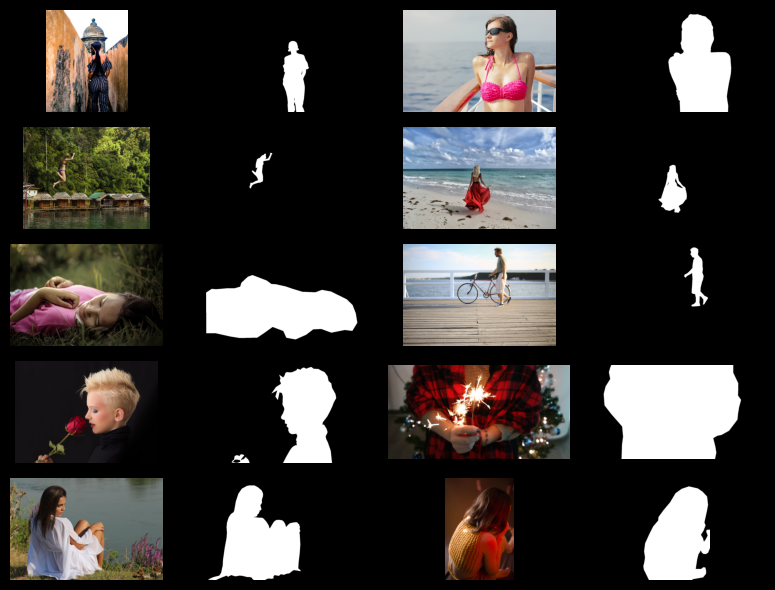

In [99]:
load_n_samples(new_df, 20, path='plots/dataset2.png')

In [89]:
new_df = new_df[['image', 'mask']]
new_df.to_csv('People2/paths.csv', index=False)

In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2011 non-null   object
 1   mask    2011 non-null   object
dtypes: object(2)
memory usage: 31.5+ KB
